## 훈련 세트와 테스트 세트  
머신러닝 알고리즘
- 지도학습 : 훈련하기 위한 데이터, 정답이 필요
- 비지도학습  

지도학습에서 데이터를 입력, 정답(결과)을 타깃이라고 하고 입력과 타깃을 합쳐 훈련 데이터라고 한다.  
입력 데이터에서 타깃을 결정짓는 것을 특성이라고 한다.  

데이터를 나누어 일부는 머신러닝 알고리즘을 만드는 데에 사용하고, 나머지는 만들어진 알고리즘의 성능을 평가하는 데에 쓰인다는 것은 알고 있기 때문에  
바로 데이터를 나눠보겠습니다. 

In [1]:
#fish의 길이와 무게에 대한 데이터
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

fish_length와 fist_weight 이 각각의 데이터를 fish_data라는 이름의 하나의 데이터로 묶고,  
target 변수로 도미 35마리, 빙어 14마리로 각각 지정해줍니다.

In [2]:
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1]*35 + [0]*14  #target 변수를 앞선 35개엔 1로, 나머지 14개에는 0으로 부여

모델 객체를 만들기 위하여 사이킷런의 KNeighborsClassifier을 임포트해줍니다. 

In [3]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

전체 데이터에서 처음 35개의 데이터를 훈련 세트로, 나머지 14개의 데이터를 테스트 세트로 사용합니다.   
슬라이싱하여 선택해줍니다.  
슬라이싱을 사용할 때 마지막 인덱스의 번호는 포함되지 않는다는 것을 유의합니다.

In [4]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용할 때
train_input = fish_data[:35]
train_target = fish_target[:35]

# 테스트 세트로 입력값 중 35번째부터 마지막 인덱스까지 사용할 때
test_input = fish_data[35:]
test_target = fish_target[35:]

훈련 데이터와 테스트용 데이터를 준비했으니 훈련 세트로 fit() 메서드를 호출하여 모델을 훈련하고,  
테스트 세트로 score() 매서드를 호출하여 평가해봅니다. 

In [5]:
kn = kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

정확도가 0이 나오는 것을 확인할 수 있는데, 이는 훈련세트와 테스트세트가 적절하지 못하게 나뉘었기 때문입니다.  
fish_data에는 순서대로 35개의 도미와 14개의 빙어가 들어있기 때문에, 훈련세트에 빙어가 없었다는 것입니다.  
이러한 샘플링 편향을 방지하기 위해 데이터를 섞거나 고루 샘플을 뽑는 법을 알아보겠습니다.

배열을 다루기 위해서는 파이썬의 대표적인 배열 라이브러리인 numpy를 알아야 합니다.  
넘파이를 사용하여 데이터를 다시 나눌 것이기 때문에 우선 import를 해줍니다. 

In [6]:
import numpy as np

그리고 넘파이를 이용하여 파이썬 리스트 형태였던 fish_data, fish_target을 넘파이 배열로 바꿔줍니다.

In [7]:
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


원하는 형태로 잘 저장된 것을 볼 수 있습니다.  
이제 무작위로 샘플을 고릅니다.  
우선 인덱스를 input_arr와 target_arr에 부여하고 랜덤하게 섞어보겠습니다.

In [8]:
np.random.seed(42)
index = np.arange(49)
np.random.shuffle(index)

이제 인덱스를 출력하면 골고루 섞인 인덱스를 확인할 수 있습니다. 

In [9]:
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


이제 넘파이 배열을 인덱스로 전달하여 랜덤한 35개의 샘플을 train 세트로 만들고,  
나머지 14개의 샘플을 test 세트로 만듭니다.

In [10]:
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

이제 훈련 데이터를 잘 섞어서 만들었으니 산점도를 그려 잘 섞여있는지 다시 한 번 확인해보도록 하겠습니다.

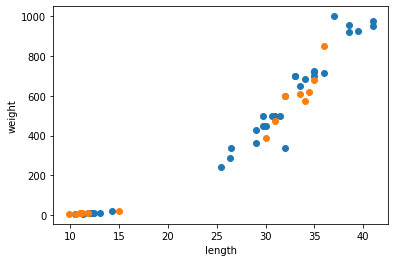

In [11]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(test_input[:,0], test_input[:,1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

주황색과 파란색이 적절히 잘 섞여있는 것을 확인할 수 있습니다.  
이제 데이터세트가 잘 나뉜 것을 보았으니 머신러닝 모델을 다시 만들어 봅니다.

In [12]:
kn = kn.fit(train_input, train_target)

In [13]:
kn.score(test_input, test_target)

1.0

아까와 달리 정확도가 1.0, 즉 100퍼센트가 나왔습니다.  
이제 predict() 메서드를 사용하여 예측 결과와 실제 타깃을 확인합니다.

In [14]:
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [15]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

predict 메서드를 사용한 결과와 실제 test_target 결과가 일치합니다.

처음에 진행한 모델링에서는 도미와 빙어가 적절히 섞이지 않은 데이터를 가지고 훈련을 했기 때문에 정확도가 매우 떨어졌지만, 후에 데이터를 적절히 잘 섞어 골라 모델을 만들고 나니 정확도가 올라가는 것을 경험할 수 있었습니다.  
이와 같이 데이터를 추출하여 지도학습을 할 때에 train dataset과 test dataset을 적절히 잘 나누어 모델링을 해야 좋은 결과를 얻을 수 있습니다.